In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [3]:
df=pd.read_csv('startup_funding.csv', encoding='utf-8')
df.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,0,01/08/2017,TouchKin,Technology,Predictive Care Platform,Bangalore,Kae Capital,Private Equity,"1,300,000",NaN
1,1,02/08/2017,Ethinos,Technology,Digital Marketing Agency,Mumbai,Triton Investment Advisors,Private Equity,NaN,NaN
2,2,02/08/2017,Leverage Edu,Consumer Internet,Online platform for Higher Education Services,New Delhi,"Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...",Seed Funding,NaN,NaN
3,3,02/08/2017,Zepo,Consumer Internet,DIY Ecommerce platform,Mumbai,"Kunal Shah, LetsVenture, Anupam Mittal, Hetal ...",Seed Funding,"500,000",NaN
4,4,02/08/2017,Click2Clinic,Consumer Internet,healthcare service aggregator,Hyderabad,"Narottam Thudi, Shireesh Palle",Seed Funding,"850,000",NaN


Code:1- To find which cities got maximum number of fundings.(pulling top 10 cities to get an idea at first)

In [5]:
df1=df.copy()
def strip_city1(city):
    return city.split('/')[0].strip()
def strip_city2(city):
    return city.split()[0].strip()
def change_case(city):
    city=str(city)
    return city[0].upper()+city[1:]

df1.dropna(subset=['CityLocation'],inplace=True)
#df1['CityLocation']=str(df1['CityLocation'])
df1['CityLocation']=df1['CityLocation'].apply(strip_city1)
df1['CityLocation']=df['CityLocation'].apply(change_case)
df1['CityLocation'][df1['CityLocation']=='Delhi']='New Delhi'
df1['CityLocation'][df1['CityLocation']=='Gurugram']='Gurgaon'
df1['CityLocation'][df1['CityLocation']=='Bengaluru']='Bangalore'
df1['CityLocation'][df1['CityLocation']=='Bombay']='Mumbai'
df1['CityLocation']=df1['CityLocation'].apply(strip_city1)

ans=df1['CityLocation'].value_counts()[:10]
city=ans.index
city_count=ans.values


for i in range(len(city)):
    print(city[i], city_count[i])

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


C:\Users\ankchauh\AppData\Local\Temp\ipykernel_21980\2965271414.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CityLocation'][df1['CityLocation']=='Delhi']='New Delhi'
C:\Users\ankchauh\AppData\Local\Temp\ipykernel_21980\2965271414.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['CityLocation'][df1['CityLocation']=='Gurugram']='Gurgaon'
C:\Users\ankchauh\AppData\Local\Temp\ipykernel_21980\2965271414.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.h

Now doing the same analysis considering only Bangalore, Mumbai, New Delhi, Gurgaon, and Noida.

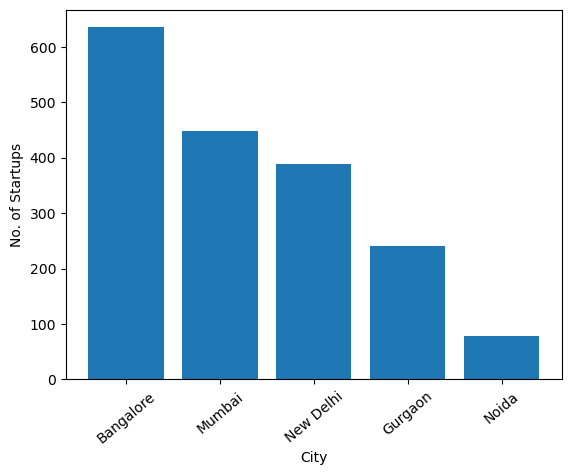

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Noida 79


In [6]:
ans1=df1['CityLocation'][(df1['CityLocation']=='New Delhi')|(df1['CityLocation']=='Gurgaon')|(df1['CityLocation']=='Noida')|(df1['CityLocation']=='Bangalore')|(df1['CityLocation']=='Mumbai')]
ans1=ans1.value_counts()
city=ans1.index
count=ans1.values

plt.bar(city, count)
plt.xticks(rotation=40)
plt.xlabel('City')
plt.ylabel('No. of Startups')
plt.show()

for i in range(5):
    print(city[i], count[i])

Code:2- To extract top 5 investor from data(considering repeat investments in one startup). 

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


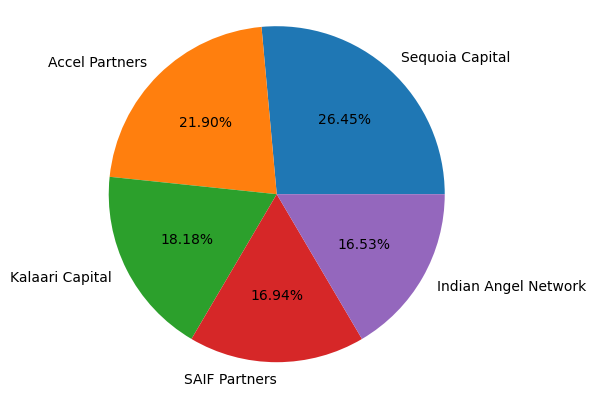

In [25]:
df2=df.copy()
df2['InvestorsName'].dropna(inplace=True)
df2 = df2[df2.InvestorsName != 'Undisclosed Investors']
df2 = df2[df2.InvestorsName != 'Undisclosed investors']
df2 = df2[df2.InvestorsName != 'undisclosed investors']
df2 = df2[df2.InvestorsName != 'undisclosed investor']
data=df2['InvestorsName'].values
investors=[]
for i in data:
    names=str(i)
    names=names.split(',')
    for j in names:
        name=j.strip()
        investors.append(name)
investors=np.array(investors)
names, counts=np.unique(investors, return_counts=True)
ans2=[]
for i in range(len(names)):
    ans2.append([counts[i], names[i]])
ans2.sort(reverse=True)
for i in range(5):
    print(ans2[i][1], ans2[i][0])

for i in range(5):
    names[i]=ans2[i][1]
    counts[i]=ans2[i][0]
names=names[:5]
counts=counts[:5]

plt.pie(counts, labels=names, autopct='%0.2f%%')
plt.axis('equal')
plt.show()

Code3: To extract top 5 investors who invested in different startups.

Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


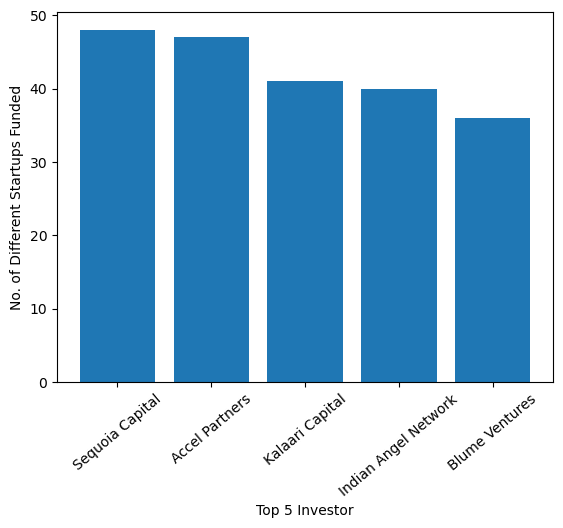

In [40]:
df3=df.copy()
df3['InvestorsName'].dropna(inplace=True)
df3 = df3[df3.InvestorsName != 'Undisclosed Investors']
df3 = df3[df3.InvestorsName != 'Undisclosed investors']
df3 = df3[df3.InvestorsName != 'undisclosed investors']
df3 = df3[df3.InvestorsName != 'undisclosed investor']

df3['StartupName'].replace('ola','Ola', inplace=True)
df3['StartupName'].replace('oyo','Oyo', inplace=True)
df3['StartupName'].replace('Oyorooms','Oyo',inplace = True)
df3['StartupName'].replace('OyoRooms','Oyo',inplace = True)
df3['StartupName'].replace('Oyo Rooms','Oyo',inplace = True)
df3['StartupName'].replace('OYO Rooms','Oyo',inplace = True)
df3['StartupName'].replace('urbanclap','UrbanClap',inplace=True)
df3['StartupName'].replace('Urbanclap','UrbanClap',inplace=True)
df3['StartupName'].replace('urbanClap','UrbanClap',inplace=True)
df3['StartupName'].replace('urban clap','UrbanClap',inplace=True)
df3['StartupName'].replace('Urban clap','UrbanClap',inplace=True)
df3['StartupName'].replace('urban Clap','UrbanClap',inplace=True)
df3['StartupName'].replace('Urban Clap','UrbanClap',inplace=True)
df3['StartupName'].replace('flipkart','Flipkart', inplace=True)
df3['StartupName'].replace('Paytm Marketplace','Paytm', inplace=True)
df3['StartupName'].replace('paytm','Paytm', inplace=True)
df3['StartupName'].replace('flipkart','Flipkart', inplace=True)
df3['StartupName'].replace('Flipkart.com','Flipkart', inplace=True)
df3['StartupName'].replace('flipkart.com','Flipkart', inplace=True)
df3['StartupName'].replace('Ola Cabs','Ola', inplace=True)
df3['StartupName'].replace('OlaCabs','Ola', inplace=True)
df3['StartupName'].replace('Olacabs','Ola', inplace=True)
df3['StartupName'].replace('olacabs','Ola', inplace=True)
df3['StartupName'].replace('snapdeal','Snapdeal', inplace=True)

investor=[]
startup=[]
for i, row in df3.iterrows():
    names=str(row['InvestorsName'])
    names=names.split(',')
    for j in names:
        if j!='':
            name=j.strip()
            investor.append(name)
            startup.append(row['StartupName'])
df_ans=pd.DataFrame({'InvestorsName':investor,'StartupName':startup})
df_ans=df_ans.groupby(['InvestorsName'])['StartupName'].nunique()
df_ans=df_ans.sort_values(ascending=False)[:5]
for i in range(5):
    print(df_ans.index[i], df_ans.values[i])
    
investor=df_ans.index
count=df_ans.values
plt.bar(investor, count)
plt.xticks(rotation=40)
plt.xlabel('Top 5 Investor')
plt.ylabel('No. of Different Startups Funded')
plt.show()

Code4: To find top investors under Seed Funding and Crowd Funding.

Indian Angel Network 33
Rajan Anandan 23
Anupam Mittal 16
LetsVenture 16
Group of Angel Investors 14


C:\Users\ankchauh\AppData\Local\Temp\ipykernel_21980\3396200214.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['InvestmentType'][df4['InvestmentType']=='PrivateEquity']='Private Equity'
C:\Users\ankchauh\AppData\Local\Temp\ipykernel_21980\3396200214.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['InvestmentType'][df4['InvestmentType']=='Crowd funding']='Crowd Funding'


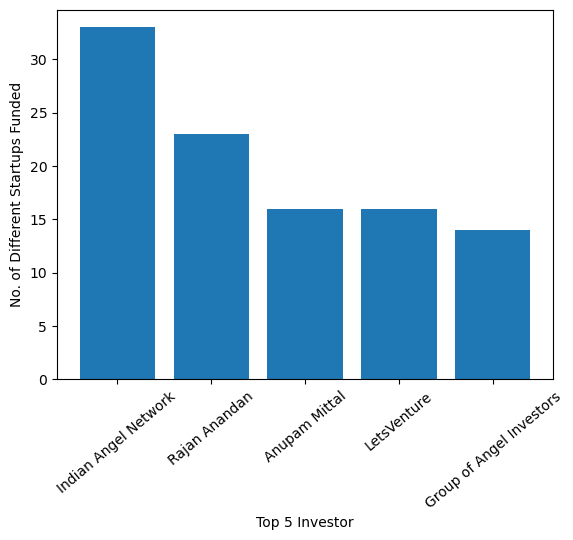

In [43]:
df4=df.copy()
df4['InvestorsName'].dropna(inplace=True)
df4=df4[df4.InvestorsName!='Undisclosed Investors']
df4=df4[df4.InvestorsName!='Undisclosed investors']
df4=df4[df4.InvestorsName!='undisclosed investors']
df4=df4[df4.InvestorsName!='undisclosed investor']

df4['StartupName'].replace('ola','Ola', inplace=True)
df4['StartupName'].replace('oyo','Oyo', inplace=True)
df4['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df4['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df4['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df4['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df4['StartupName'].replace('urbanclap','UrbanClap',inplace=True)
df4['StartupName'].replace('Urbanclap','UrbanClap',inplace=True)
df4['StartupName'].replace('urbanClap','UrbanClap',inplace=True)
df4['StartupName'].replace('urban clap','UrbanClap',inplace=True)
df4['StartupName'].replace('Urban clap','UrbanClap',inplace=True)
df4['StartupName'].replace('urban Clap','UrbanClap',inplace=True)
df4['StartupName'].replace('Urban Clap','UrbanClap',inplace=True)
df4['StartupName'].replace('flipkart','Flipkart', inplace=True)
df4['StartupName'].replace('Paytm Marketplace','Paytm', inplace=True)
df4['StartupName'].replace('paytm','Paytm', inplace=True)
df4['StartupName'].replace('flipkart','Flipkart', inplace=True)
df4['StartupName'].replace('Flipkart.com','Flipkart', inplace=True)
df4['StartupName'].replace('flipkart.com','Flipkart', inplace=True)
df4['StartupName'].replace('Ola Cabs','Ola', inplace=True)
df4['StartupName'].replace('OlaCabs','Ola', inplace=True)
df4['StartupName'].replace('Olacabs','Ola', inplace=True)
df4['StartupName'].replace('olacabs','Ola', inplace=True)
df4['StartupName'].replace('snapdeal','Snapdeal', inplace=True)

df4['InvestmentType'][df4['InvestmentType']=='SeedFunding']='Seed Funding'
df4['InvestmentType'][df4['InvestmentType']=='PrivateEquity']='Private Equity'
df4['InvestmentType'][df4['InvestmentType']=='Crowd funding']='Crowd Funding'

df4=df4[df4.InvestmentType!='Private Equity']
df4=df4[df4.InvestmentType!='Debt Funding']

investor=[]
startup=[]
for i, row in df4.iterrows():
    names=str(row['InvestorsName'])
    names=names.split(',')
    for j in names:
        if j!='':
            name=j.strip()
            investor.append(name)
            startup.append(row['StartupName'])
df_ans=pd.DataFrame({'InvestorsName':investor,'StartupName':startup})
df_ans=df_ans.groupby(['InvestorsName'])['StartupName'].nunique()
df_ans=df_ans.sort_values(ascending=False)[:5]
for i in range(5):
    print(df_ans.index[i], df_ans.values[i])
    
investor=df_ans.index
count=df_ans.values
plt.bar(investor, count)
plt.xticks(rotation=40)
plt.xlabel('Top 5 Investor')
plt.ylabel('No. of Different Startups Funded')
plt.show()

Code5: To find top investors under Private Equity.

Sequoia Capital 45
Accel Partners 43
Kalaari Capital 35
Blume Ventures 27
SAIF Partners 24


C:\Users\ankchauh\AppData\Local\Temp\ipykernel_21980\1356030310.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['InvestmentType'][df5['InvestmentType']=='PrivateEquity']='Private Equity'
C:\Users\ankchauh\AppData\Local\Temp\ipykernel_21980\1356030310.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5['InvestmentType'][df5['InvestmentType']=='Crowd funding']='Crowd Funding'


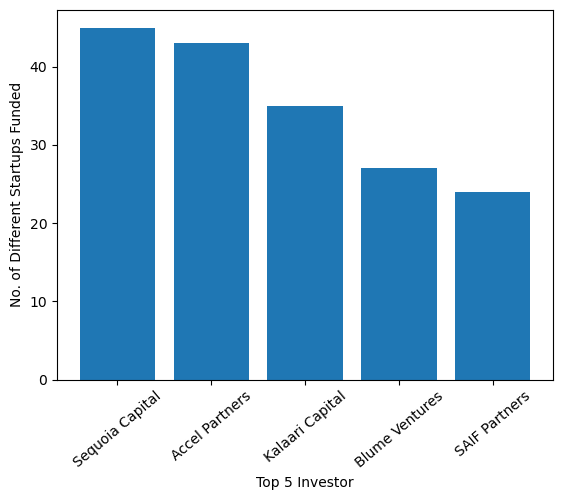

In [44]:
df5=df.copy()
df5['InvestorsName'].dropna(inplace=True)
df5=df5[df5.InvestorsName!='Undisclosed Investors']
df5=df5[df5.InvestorsName!='Undisclosed investors']
df5=df5[df5.InvestorsName!='undisclosed investors']
df5=df5[df5.InvestorsName!='undisclosed investor']

df5['StartupName'].replace('ola','Ola', inplace=True)
df5['StartupName'].replace('oyo','Oyo', inplace=True)
df5['StartupName'].replace('Oyorooms','Oyo',inplace=True)
df5['StartupName'].replace('OyoRooms','Oyo',inplace=True)
df5['StartupName'].replace('Oyo Rooms','Oyo',inplace=True)
df5['StartupName'].replace('OYO Rooms','Oyo',inplace=True)
df5['StartupName'].replace('urbanclap','UrbanClap',inplace=True)
df5['StartupName'].replace('Urbanclap','UrbanClap',inplace=True)
df5['StartupName'].replace('urbanClap','UrbanClap',inplace=True)
df5['StartupName'].replace('urban clap','UrbanClap',inplace=True)
df5['StartupName'].replace('Urban clap','UrbanClap',inplace=True)
df5['StartupName'].replace('urban Clap','UrbanClap',inplace=True)
df5['StartupName'].replace('Urban Clap','UrbanClap',inplace=True)
df5['StartupName'].replace('flipkart','Flipkart', inplace=True)
df5['StartupName'].replace('Paytm Marketplace','Paytm', inplace=True)
df5['StartupName'].replace('paytm','Paytm', inplace=True)
df5['StartupName'].replace('flipkart','Flipkart', inplace=True)
df5['StartupName'].replace('Flipkart.com','Flipkart', inplace=True)
df5['StartupName'].replace('flipkart.com','Flipkart', inplace=True)
df5['StartupName'].replace('Ola Cabs','Ola', inplace=True)
df5['StartupName'].replace('OlaCabs','Ola', inplace=True)
df5['StartupName'].replace('Olacabs','Ola', inplace=True)
df5['StartupName'].replace('olacabs','Ola', inplace=True)
df5['StartupName'].replace('snapdeal','Snapdeal', inplace=True)

df5['InvestmentType'][df5['InvestmentType']=='SeedFunding']='Seed Funding'
df5['InvestmentType'][df5['InvestmentType']=='PrivateEquity']='Private Equity'
df5['InvestmentType'][df5['InvestmentType']=='Crowd funding']='Crowd Funding'

df5=df5[df5['InvestmentType']=='Private Equity']

investor=[]
startup=[]
for i, row in df5.iterrows():
    names=str(row['InvestorsName'])
    names=names.split(',')
    for j in names:
        if j!='':
            name=j.strip()
            investor.append(name)
            startup.append(row['StartupName'])
df_ans=pd.DataFrame({'InvestorsName':investor,'StartupName':startup})
df_ans=df_ans.groupby(['InvestorsName'])['StartupName'].nunique()
df_ans=df_ans.sort_values(ascending=False)[:5]
for i in range(5):
    print(df_ans.index[i], df_ans.values[i])
    
investor=df_ans.index
count=df_ans.values
plt.bar(investor, count)
plt.xticks(rotation=40)
plt.xlabel('Top 5 Investor')
plt.ylabel('No. of Different Startups Funded')
plt.show()